In [1]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/data3size10.csv")
y = df['class']

In [2]:
img_list = []
size = 64
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [3]:
from tensorflow.keras.utils import to_categorical
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),3),to_categorical((np.array(y_val)),3),to_categorical((np.array(y_test)),3)

In [4]:
#モデルの設定
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(size, size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

In [5]:
from tensorflow.python.keras.callbacks import TensorBoard

model.compile(
   optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#tsb = TensorBoard(log_dir='./logs')
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(X_val,y_val))

Epoch 1/20
473/473 [==============================] - 28s 58ms/step - loss: 0.7867 - accuracy: 0.6790 - val_loss: 0.6987 - val_accuracy: 0.7292
Epoch 2/20
473/473 [==============================] - 26s 55ms/step - loss: 0.6636 - accuracy: 0.7357 - val_loss: 0.6557 - val_accuracy: 0.7325
Epoch 3/20
473/473 [==============================] - 26s 55ms/step - loss: 0.6064 - accuracy: 0.7535 - val_loss: 0.5494 - val_accuracy: 0.7786
Epoch 4/20
473/473 [==============================] - 26s 55ms/step - loss: 0.5560 - accuracy: 0.7749 - val_loss: 0.5304 - val_accuracy: 0.7797
Epoch 5/20
473/473 [==============================] - 28s 59ms/step - loss: 0.5029 - accuracy: 0.7931 - val_loss: 0.5047 - val_accuracy: 0.7967
Epoch 6/20
473/473 [==============================] - 28s 58ms/step - loss: 0.4886 - accuracy: 0.7990 - val_loss: 0.5129 - val_accuracy: 0.7863
Epoch 7/20
473/473 [==============================] - 26s 56ms/step - loss: 0.4737 - accuracy: 0.8071 - val_loss: 0.4815 - val_accuracy:

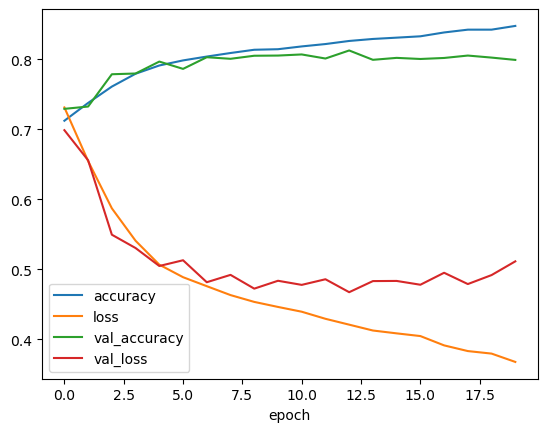

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [7]:
print(type(history))
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<class 'tensorflow.python.keras.callbacks.History'>
Test loss: 0.5074915885925293
Test accuracy: 0.8025376796722412


In [8]:
pd.DataFrame(history.history["loss"])

,0
0,0.731234
1,0.654624
2,0.587102
3,0.540742
4,0.506636
5,0.488738
6,0.475897
7,0.463175
8,0.453441
9,0.446251
